<a href="https://colab.research.google.com/github/mohmaed7777/K-means-for-clustering-the-Stars-Typs/blob/main/Clustering_Stars_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set()
print('<===============Setup is Done===================>')

<===============Setup is Done===================>


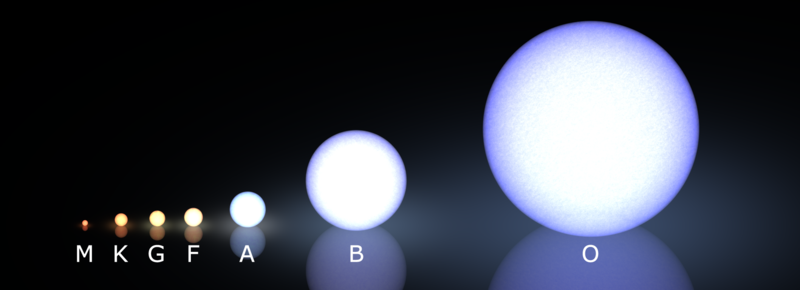

Temperature -- K

L -- L/Lo

R -- R/Ro

AM -- Mv

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS
 - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants



from 0 to 5

**-Red Dwarf - 0**

**-Brown Dwarf - 1**

**-White Dwarf - 2**

**-Main Sequence - 3**

**-Super Giants - 4**

**-Hyper Giants - 5**


In [3]:
data = pd.read_csv('/content/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
data.drop(['Type'], axis=1, inplace=True)

In [6]:
data.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


In [8]:
# Check the missing values :-
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64

In [9]:
data.shape

(240, 6)

In [10]:
data.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Yellowish               1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
White-Yellow            1
Name: Color, dtype: int64

In [11]:
data.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

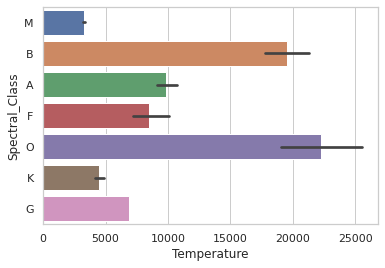

In [15]:
# Set theme
sns.set_style('whitegrid')
 
# BarChart
sns.barplot(x='Temperature', y='Spectral_Class', data=data)

In [16]:
data.describe(include='object')

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


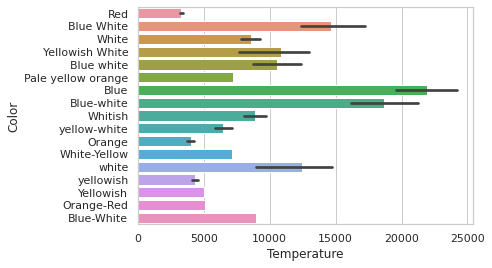

In [17]:
sns.barplot(x='Temperature', y='Color', data=data)

In [20]:
data.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [24]:
df_uniques = data.nunique()


In [26]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=20)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Color', 'Spectral_Class']

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lebel_encoder = LabelEncoder()

In [30]:
for col in categorical_vals:
  data[col] = lebel_encoder.fit_transform(data[col])


In [31]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5


In [32]:
data.Color.value_counts()

8     112
0      56
4      26
1      10
15      8
9       7
2       4
14      3
13      3
11      2
5       2
16      2
12      1
10      1
7       1
6       1
3       1
Name: Color, dtype: int64

In [33]:
data.Spectral_Class.value_counts()

5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: Spectral_Class, dtype: int64